# Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [33]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 8.0)

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
#chipo = pd.read_csv('chipotle.tsv', sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [127]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.6+ KB


In [4]:
chipo.shape

(4622, 5)

In [5]:
chipo.shape[0] * chipo.shape[1]

23110

Attention: .size is to show the number of elements in the dataframe

In [6]:
chipo.size

23110

### Step 6. What is the number of columns in the dataset?

In [7]:
chipo.shape[1]

5

In [8]:
chipo.columns.size

5

### Step 7. Print the name of all the columns.

In [9]:
chipo.columns

Index([u'order_id', u'quantity', u'item_name', u'choice_description',
       u'item_price'],
      dtype='object')

In [10]:
print chipo.columns.tolist()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


### Step 8. How is the dataset indexed?

In [11]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most ordered item?

In [128]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


the number of total orders for each item in descending order

In [19]:
chipo.groupby('item_name')['quantity'].sum().sort_values(ascending = False).head(10)

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

the number of order in average for each item in the descending order

In [18]:
chipo.groupby('item_name')['quantity'].mean().sort_values(ascending = False).head(10)

item_name
Bowl                                   2.000000
Bottled Water                          1.302469
Chips and Tomatillo-Red Chili Salsa    1.250000
Canned Soda                            1.211538
Chips and Fresh Tomato Salsa           1.181818
Canned Soft Drink                      1.166113
Carnitas Crispy Tacos                  1.142857
Veggie Soft Tacos                      1.142857
Chicken Salad Bowl                     1.118182
Barbacoa Crispy Tacos                  1.090909
Name: quantity, dtype: float64

count of unique values in the column (number of orders of each item)

In [17]:
chipo['item_name'].value_counts().sort_values(ascending = False).head(10)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

this command is similar to the following command (.size shows the number of elements)

In [25]:
chipo[['item_name','quantity']].groupby(['item_name']).size().sort_values(ascending = False).head(10)

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
dtype: int64

####  Step 9.1 Make plots of absolute and relative number of items

In [26]:
chipo.groupby('item_name')['quantity']

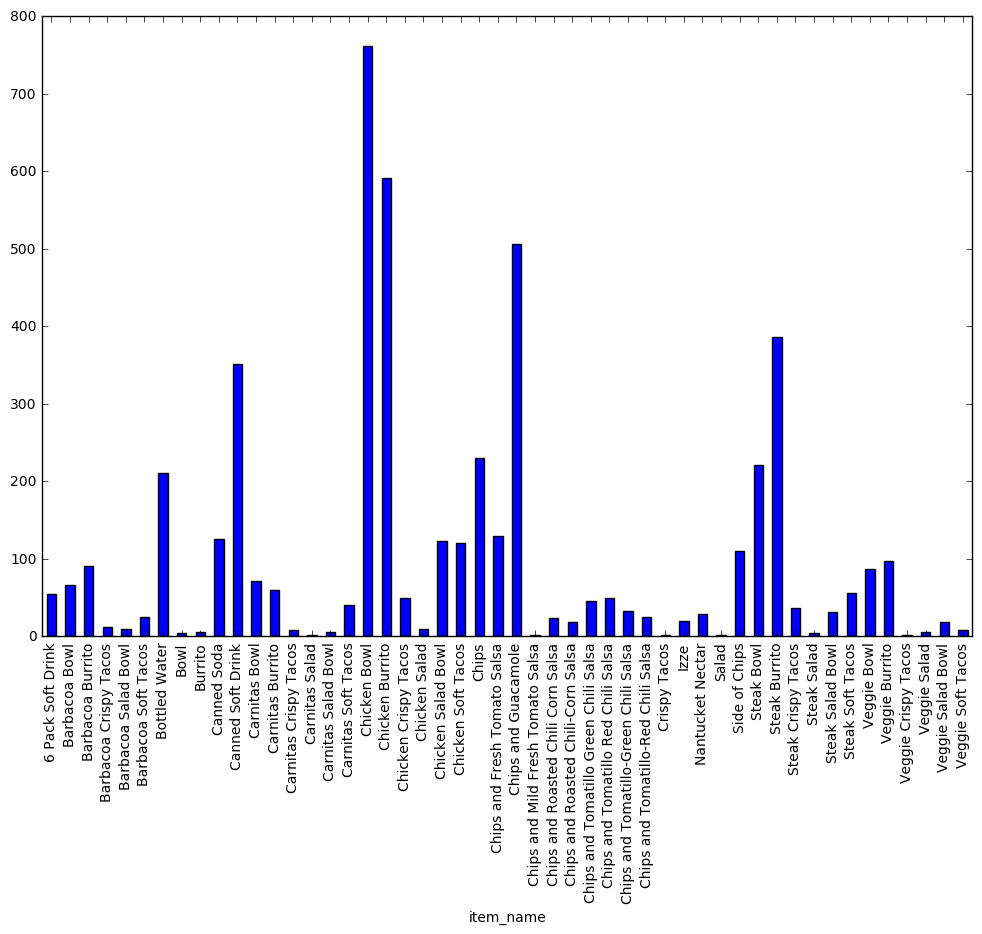

In [34]:
df = chipo.groupby('item_name')['quantity'].sum()
df.plot(kind = 'bar')

plot with a descending order of total number of orders for each item 

In [36]:
df = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending = False)

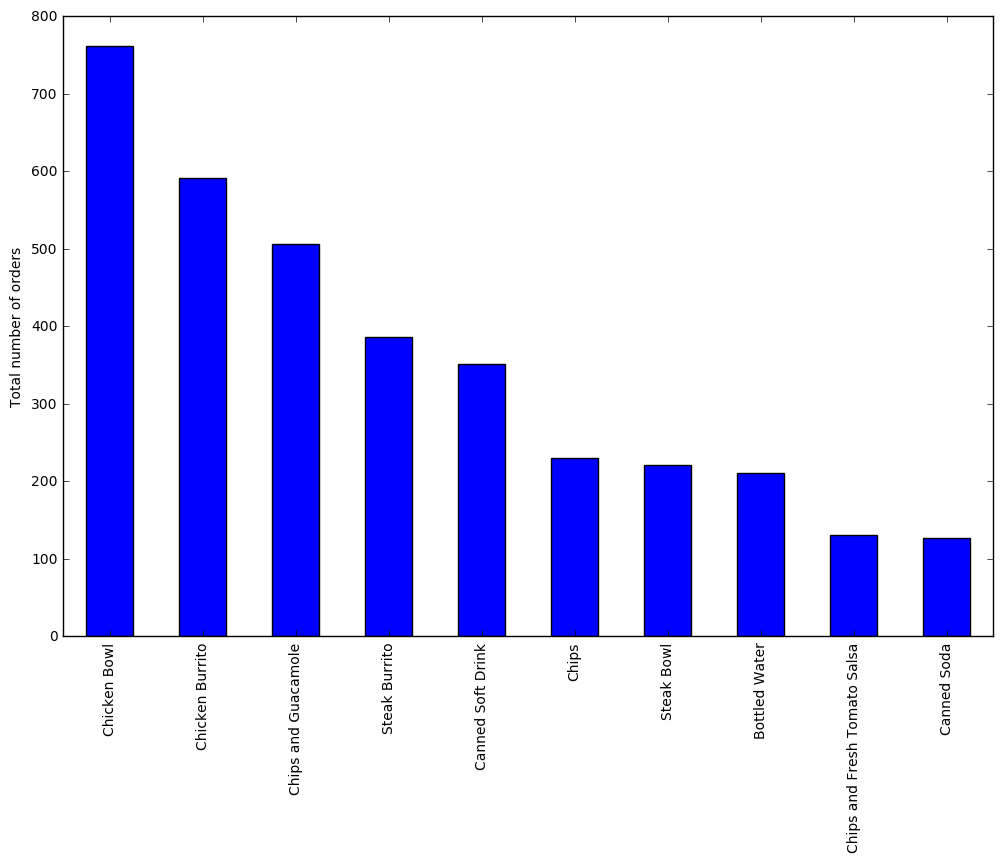

In [46]:
fig = df.head(10).plot(kind='bar')
fig.set_xlabel('')
fig.set_ylabel('Total number of orders')

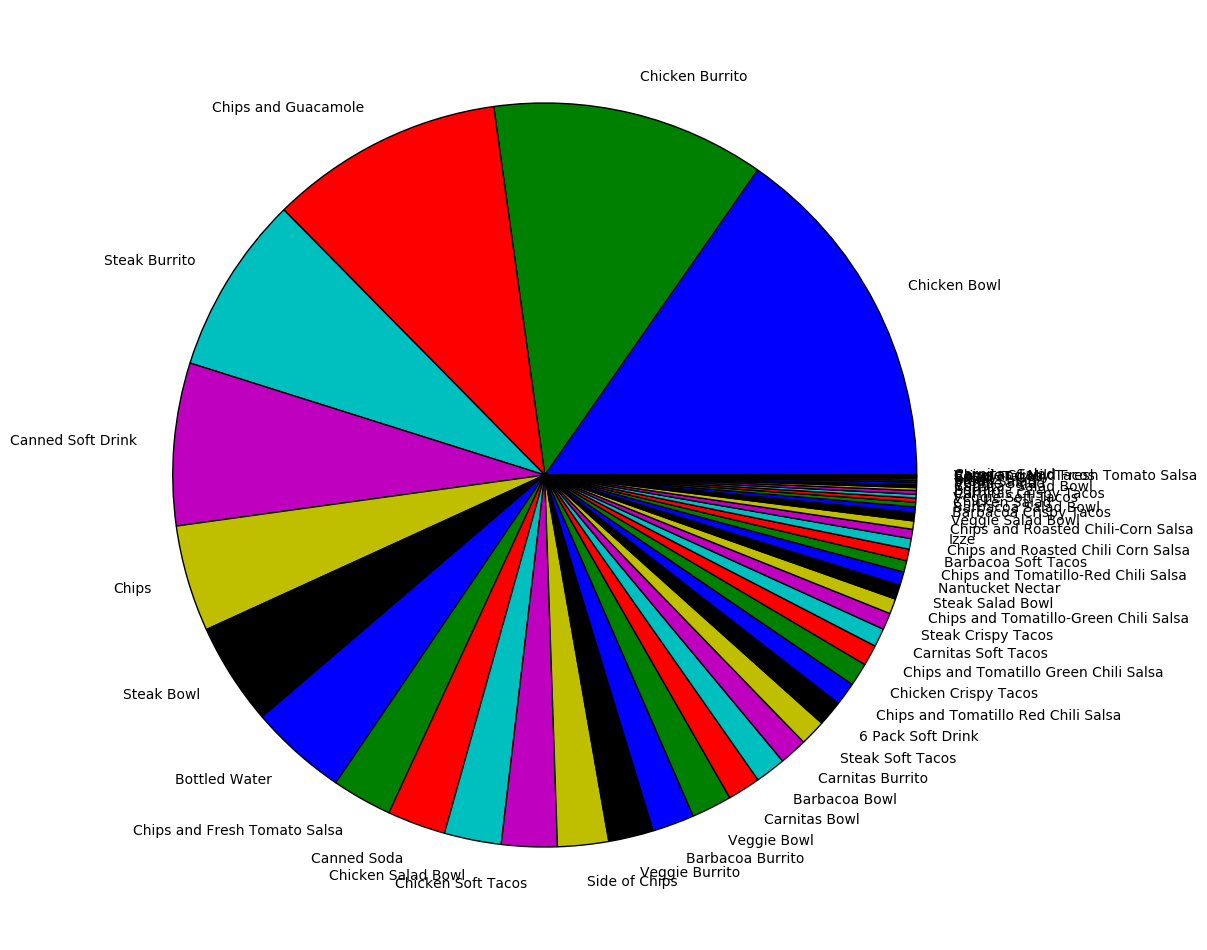

In [48]:
df = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending = False)
fig = df.plot(kind='pie', figsize = (12,12))
fig.set_ylabel('')

compute the frequency of each item 

In [61]:
df2 = df / df.sum()
df2.head(10)

item_name
Chicken Bowl                    0.153057
Chicken Burrito                 0.118866
Chips and Guacamole             0.101770
Steak Burrito                   0.077635
Canned Soft Drink               0.070595
Chips                           0.046259
Steak Bowl                      0.044449
Bottled Water                   0.042438
Chips and Fresh Tomato Salsa    0.026146
Canned Soda                     0.025342
Name: quantity, dtype: float64

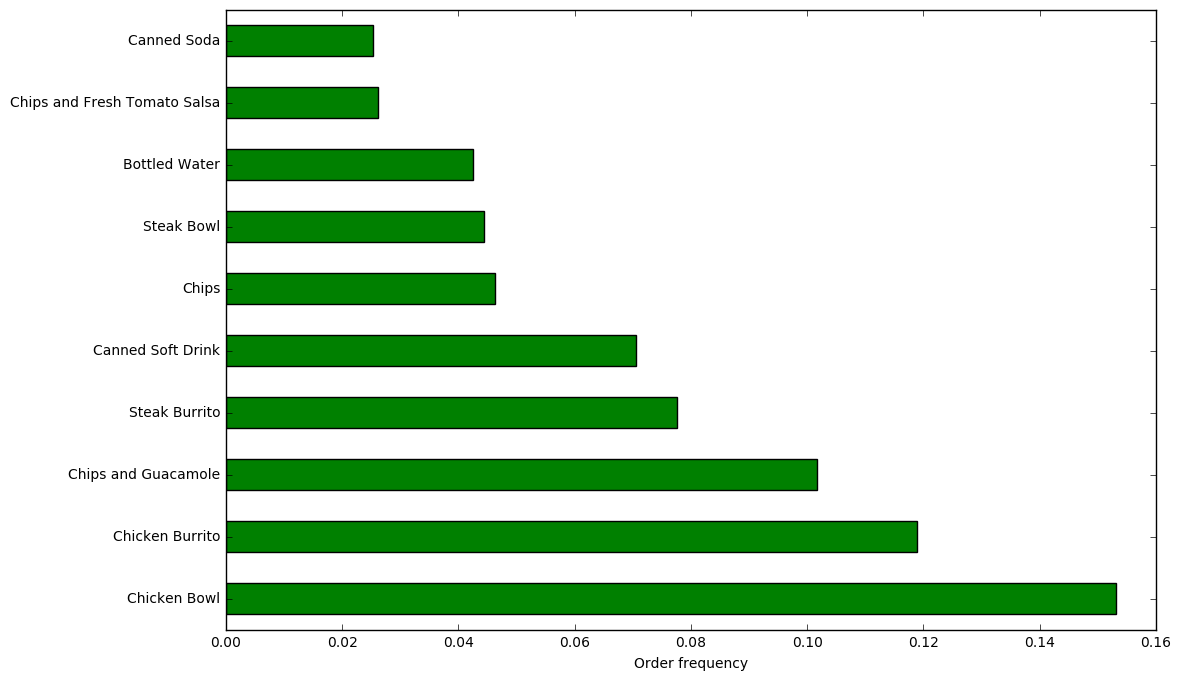

In [75]:
fig = df2.head(10).plot(kind = 'barh', color = 'g')
fig.set_ylabel('')
fig.set_xlabel('Order frequency')

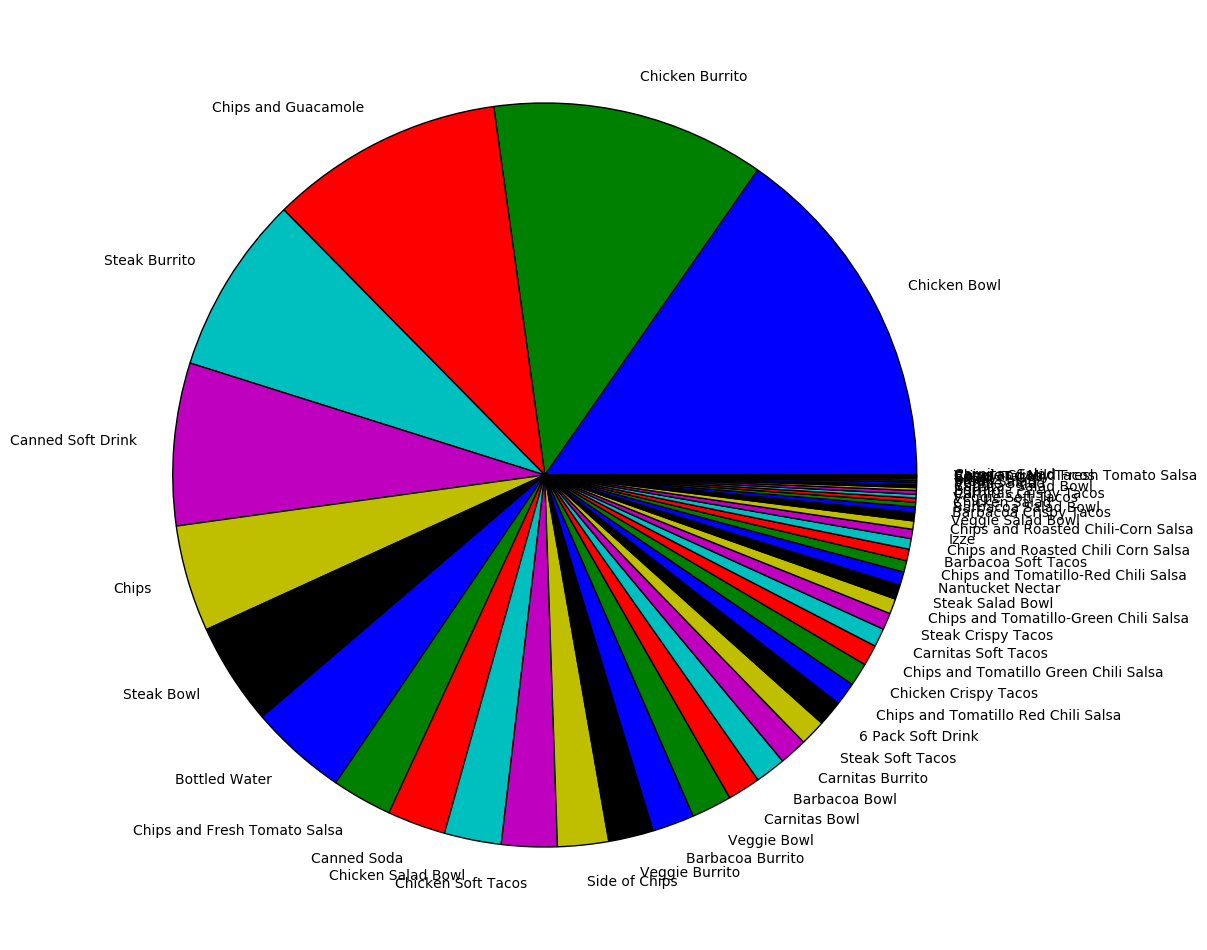

In [73]:
fig = df2.plot(kind='pie', figsize = (12,12))
fig.set_ylabel('')

### Step 10. How many items were ordered?

In [76]:
df.sum()

4972

### Step 11. What was the most ordered item in the choice_description column?

In [77]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [89]:
df = chipo['choice_description'].value_counts(dropna=False).sort_values(ascending = False)

In [90]:
df.head(10)

NaN                                                                                  1246
[Diet Coke]                                                                           134
[Coke]                                                                                123
[Sprite]                                                                               77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                 42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]      40
[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice, Cheese, Sour Cream]]                   36
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                          33
[Lemonade]                                                                             33
[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Lettuce]]                              29
Name: choice_description, dtype: int64

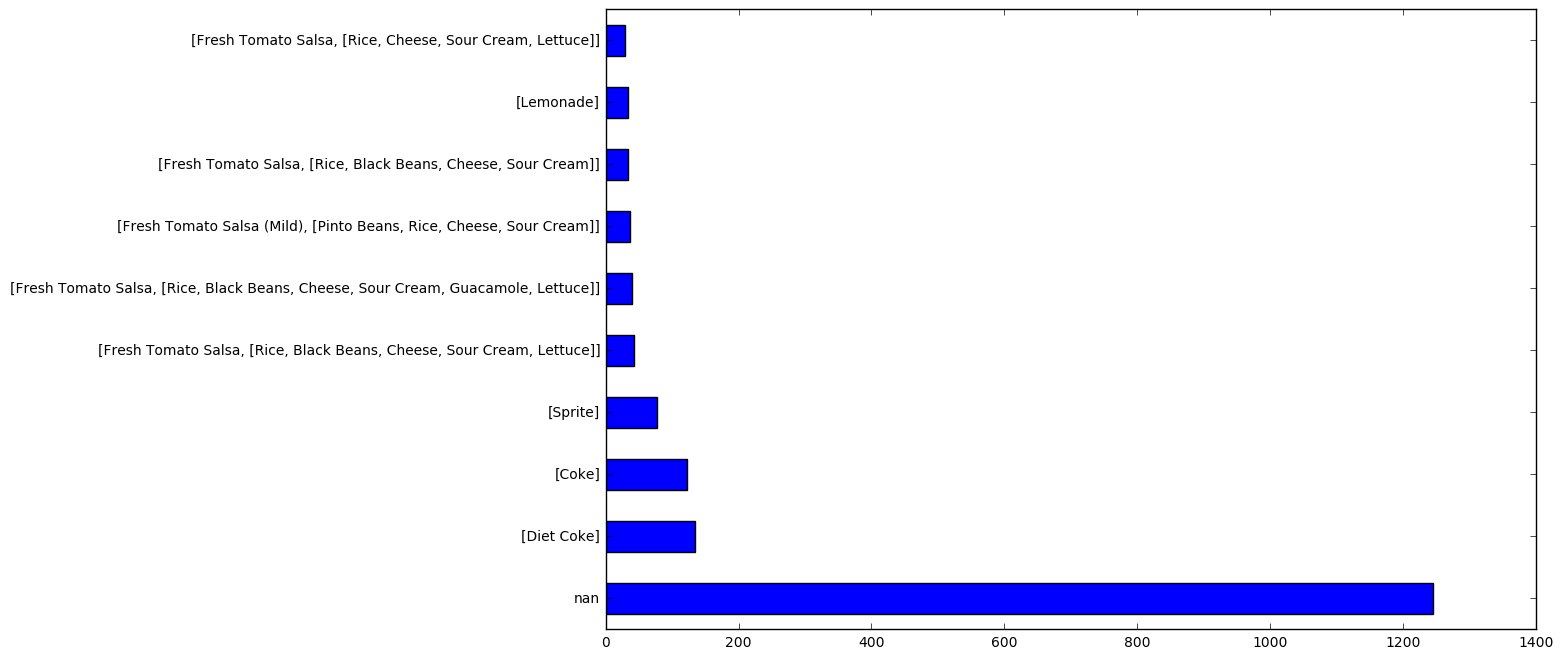

In [91]:
df.head(10).plot(kind = 'barh')

Indeed, the empty choice description is the most popular

In [93]:
df.idxmax()

nan

### Step 12. How many items were orderd in total?

In [96]:
chipo.quantity.sum()

4972

### Step 13. Turn the item price into a float

In [103]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [107]:
chipo['item_price'] = chipo['item_price'].str.replace('$','').astype('float')
chipo['item_price'].head(10)

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
5    10.98
6     1.69
7    11.75
8     9.25
9     9.25
Name: item_price, dtype: float64

### Step 14. How much was the revenue for the period in the dataset?

In [108]:
chipo['item_price'].sum()

34500.160000000003

### Step 15. How many orders were made in the period?

In [117]:
chipo['order_id'].max()

1834

In [114]:
chipo['order_id'].unique().shape[0]

1834

.count : the number of non-NaN observations in a series

In [131]:
chipo['order_id'].value_counts().count()

1834

to see the maximal number of items placed in one order

In [134]:
chipo['order_id'].value_counts().sort_values(ascending = False).head(20)

926     23
1483    14
205     12
691     11
1786    11
759     11
491     10
1660     9
561      9
1006     8
818      8
916      8
195      8
953      8
577      7
1449     7
1443     7
511      7
1655     6
628      6
Name: order_id, dtype: int64

### Step 16. What is the average amount per order?

In [118]:
chipo['item_price'].sum() / chipo['order_id'].unique().shape[0]

18.811428571428575

In [141]:
chipo.groupby('order_id').head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


apply a sum command to the dataframe, it will affect only the column with float values

In [138]:
chipo.groupby('order_id').sum().head(10)

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
6,2,17.50
7,2,15.70
8,2,10.88
9,3,10.67


In [142]:
chipo.groupby('order_id').sum().mean()

quantity       2.711014
item_price    18.811429
dtype: float64

### Step 17. How many different items are sold?

In [121]:
chipo['item_name'].unique().shape[0]

50

In [126]:
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos', 'Chicken Soft Tacos',
       'Chicken Burrito', 'Canned Soda', 'Barbacoa Burrito',
       'Carnitas Burrito', 'Carnitas Bowl', 'Bottled Water',
       'Chips and Tomatillo Green Chili Salsa', 'Barbacoa Bowl', 'Chips',
       'Chicken Salad Bowl', 'Steak Bowl', 'Barbacoa Soft Tacos',
       'Veggie Burrito', 'Veggie Bowl', 'Steak Crispy Tacos',
       'Chips and Tomatillo Red Chili Salsa', 'Barbacoa Crispy Tacos',
       'Veggie Salad Bowl', 'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos', 'Ste

In [144]:
chipo['item_name'].value_counts().count()

50